## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Conclusion](#conclusions)

<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.query("group == 'control' and landing_page == 'new_page'")

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


b. Use the cell below to find the number of rows in the dataset.

In [4]:
len(df)

294478

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [6]:
df[df.converted == 0].converted.mean()

0.0

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
len(df[((df.group == 'treatment') & (df.landing_page != 'new_page')) | ((df.group != 'treatment') & (df.landing_page == 'new_page'))])

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
rem = df[(df.group == 'treatment') != (df.landing_page == 'new_page')]
df2 = df[~df.isin(rem)].dropna()

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
print('Num of unique user_id:', df2.user_id.nunique())

Num of unique user_id: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df2.user_id[df2.user_id.duplicated()]

2893    773192.0
Name: user_id, dtype: float64

c. What is the row information for the repeat **user_id**? 

In [13]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192.0,2017-01-14 02:55:59.590927,treatment,new_page,0.0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop(df2[df2.user_id.duplicated()].index, inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
round(df2.converted.mean(), 4)

0.1196

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
print(round(df2[df2.group == 'control'].converted.mean(), 4))

0.1204


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
round(df2[df2.group == 'treatment'].converted.mean(), 4)

0.1188

d. What is the probability that an individual received the new page?

In [18]:
round(len(df2[df2.landing_page == 'new_page']) / len(df2), 4)

0.5001

In [19]:
obs_diff = df2[df2.group == 'treatment'].converted.mean() - df2[df2.group == 'control'].converted.mean()
print(round(obs_diff, 4))

-0.0016


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

* The probability of an individual was in **Treatment** group that **converted** is even **less than** an individual was in **Control** group and converted by `(-0.0016)`


* And **both probabilities** `(0.1188, 0.1204)` are **very close** to the probability of **an individual converting regardless of the page they recieve** `(0.1196)`


* That's mean **we don't have sufficient evidence** to say that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} - p_{new} \geq 0$$

$$H_1: p_{old} - p_{new} < 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = len(df2[df2.landing_page == 'new_page'])
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = len(df2[df2.landing_page == 'old_page'])
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.binomial(1, p_new, n_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(1, p_new, n_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean() - old_page_converted.mean()

-0.0008006048408419619

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
# Simulate p_diffs
p_diffs = []
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

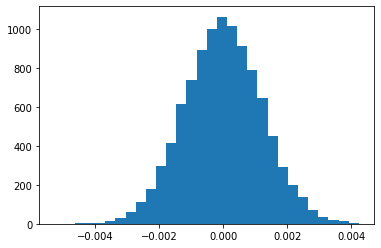

In [28]:
#Plotting a hist of the p_diffs
plt.hist(p_diffs, bins=30);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

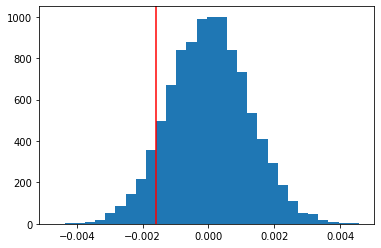

In [29]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

# Plot observed statistic with the null distibution
plt.hist(null_vals, bins=30)
plt.axvline(obs_diff, c='red');

In [30]:
# Compute p-value
print((p_diffs >= obs_diff).mean())

0.9041


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

* We just computed the **p-value** in part j.


* In statistics, the p-value is the probability of obtaining results at least as extreme as the observed results of a statistical hypothesis test, assuming that the null hypothesis is correct. The p-value is used as an alternative to rejection points to provide the smallest level of significance at which the null hypothesis would be rejected. A smaller p-value (<= 0.05) means that there is stronger evidence in favor of the alternative hypothesis.


* However, it shows above in our result that the p-value is above 0.05, which means we do not have evidence to reject the null hypothesis ($P{new} = P{old}$)

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = df2[df2.group == 'control'].converted.sum()
convert_new = df2[df2.group == 'treatment'].converted.sum()

n_old       = len(df2[df2.landing_page == 'old_page'])
n_new       = len(df2[df2.landing_page == 'new_page'])

In [32]:
convert_old, convert_new, n_old, n_new

(17489.0, 17264.0, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [33]:
# Computing the test statistic and p-value
z_score, p_value = sm.stats.proportions_ztest([convert_new,
                                               convert_old],
                                              [n_new, n_old],
                                              alternative = 'larger')
z_score, p_value

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

* The negative **z-score** indicates that your score is `1.3` standard deviations under the mean.


* This means the z-score and p-value agree with the findings in parts j and k that we cannot reject the null hypothesis. Additionally, the **p-value** here is `0.9`, which is not below our **alpha** of `0.05`.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression**, since we want to know the odds of conversion, rather than a linear figure.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
# Adding the intercept column
df2['intercept'] = 1

# Adding the two groups {a_page: 'control', ab_page: 'treatment'}
df2[['a_page', 'ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('a_page', axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104.0,2017-01-21 22:11:48.556739,control,old_page,0.0,1,0
1,804228.0,2017-01-12 08:01:45.159739,control,old_page,0.0,1,0
2,661590.0,2017-01-11 16:55:06.154213,treatment,new_page,0.0,1,1
3,853541.0,2017-01-08 18:28:03.143765,treatment,new_page,0.0,1,1
4,864975.0,2017-01-21 01:52:26.210827,control,old_page,1.0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [35]:
# Building regression model
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
# Providing the summary of the model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-11-12 17:43 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

* **The p-value associated with ab_page is `0.1899`.**
* **This model is attempting to predict whether a user will convert depending on their page's kind.**


### The hypothesis in this case is:
$$H{0}: P{new} - P{old} = 0$$
$$H{0}: P{new} - P{old} \neq 0$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

* **Till now, we see that both groups doesn't have much impact on the user conversion.**
* **Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. it might mean more interest in new resolutions. Any predictable fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal.**
* **Factors like device on which tests were taken or course which was looked at, prior academic background, age, might alter experience and ultimately, conversions. These are limitations which should be at least kept in mind while making the final decision with high confidence and high accuracy.**
* **It's important to make sure these factors are not in or of themselves colinear.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
# Reading the 'countries.csv' and store it in df_c
df_c = pd.read_csv('countries.csv')

# Adding the 'country' column to our df
df3 = df2.set_index('user_id').join(df_c.set_index('user_id'))

# Creating dummy variables from the 'country' column
df3 = df3.join(pd.get_dummies(df3['country']))

In [38]:
logit = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA', 'UK']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 12 Nov 2020   Pseudo R-squ.:               2.323e-05
Time:                        17:43:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

* From the p-values above, it also `does not appear` that country has a significant impact on conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [39]:
# Creating interaction between page and country
for i in df3.country.unique():
    df3[i+'_page'] = df3[i] * df3['ab_page']
    
# dropping the ''US_page' column
df3 = df3.drop(['US_page'], axis=1)
df3.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,CA_page,UK_page
user_id,,,,,,,,,,,,
851104.0,2017-01-21 22:11:48.556739,control,old_page,0.0,1,0,US,0,0,1,0,0
804228.0,2017-01-12 08:01:45.159739,control,old_page,0.0,1,0,US,0,0,1,0,0
661590.0,2017-01-11 16:55:06.154213,treatment,new_page,0.0,1,1,US,0,0,1,0,0
853541.0,2017-01-08 18:28:03.143765,treatment,new_page,0.0,1,1,US,0,0,1,0,0
864975.0,2017-01-21 01:52:26.210827,control,old_page,1.0,1,0,US,0,0,1,0,0


In [40]:
# Building regression model
logit = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'CA', 'UK', 'CA_page', 'UK_page']])
results = logit.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 12 Nov 2020   Pseudo R-squ.:               3.482e-05
Time:                        17:43:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

In [41]:
1/np.exp(results.params)

intercept    7.289813
ab_page      1.020776
CA           1.017682
UK           1.005761
CA_page      1.048001
UK_page      0.969090
dtype: float64

* None of the variables or the interaction above have significant p-values. Therefore, `we will fail to reject the null` and conclude that there is not sufficient evidence to suggest that there is an interaction between country and page received that will predict whether a user converts or not.

<a id='conclusions'></a>
## Conclusion:

> In the first logistic regression model: We see that both groups `(treatment, control)` **doesn't** have much impact on the user conversion.

> In the second model: After adding the country of every indivedual to the model, we could see that **country has no** significant impact on conversion.

> These inferences are strictly based on data on hand. This analysis acknowledges its limitations due to factors not included in the data.

> The above calculation gives us an interpretation for the CA_page coefficient. Holding all other variables constant, a user from **Canada** who gets **the new page** would be about `1.04 times` more likely to convert. While this holds a **small amount** of statistical significance, it **does not** hold much practical significance.

> This indicates that we **can't reject** the `Null Hypothesis` and maintain the old page.

In [2]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

1